# Collecting Ocean Water Temperature Near Alaska

For a project on analyzing the affects of climate change on whales seen in Southern California, I wanted data on water temperatures in Alaska (where the gray whales live most of the year). This notebook shows how I collected this data from datasets available online at:  http://www.ndbc.noaa.gov/station_history.php?station=46075.

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

To run the next block of code, please go to the website: http://www.ndbc.noaa.gov/station_history.php?station=46075 and download the data from 2005-2017.  The dataset gives way more information than we want, so below I just pull out the temperature of the water for each day at 12:30pm (or 12:50pm - some of the datasets are collected at different times).

In [3]:
# FOR EACH YEAR YOU DOWNLOADED you need to run this code block each time for each year.
#There are only two lines that need to be changed for changing years.  These lines are emphasised below.

with open("46075h2017.txt") as f:    #change the txt file name to change years
    reader = csv.reader(f)
    temp = [r for r in reader]
    
temp = np.array(temp)
print('Here is a sample of the data you downloaded')
print(temp[0:5,0:5])
print()

year = []
month = []
day = []
hour = []
minute = []
water = []
for i in range(temp.shape[0]-2):
    year.append(str.split(temp[i+2][0])[0])
    month.append(str.split(temp[i+2][0])[1])
    day.append(str.split(temp[i+2][0])[2])
    hour.append(str.split(temp[i+2][0])[3])
    minute.append(str.split(temp[i+2][0])[4])
    water.append(str.split(temp[i+2][0])[14])

print('Let us check if all our lengths of the data we picked out are the same:')
print(len(year)==len(month)==len(day)==len(hour)==len(minute)==len(water))
print()

table_noon30 = [['year','month','day','water_temp']]
for i in range(len(water)):
    hr = int(hour[i])
    min = int(minute[i])
    if int(hour[i]) == 12:
        if int(minute[i]) == 30 or int(minute[i]) == 50:
            table_noon30.append([year[i],month[i],day[i],water[i]])

print('Let us see how many days worth of data this picked up:')
print(len(table_noon30), 'days found.')
print()
print('Here is a sample of what data we have pulled out and saved:')
print(table_noon30[0:4])

myFile = open('temp2017_noon30or50.csv', 'w')     #change the saving name when changing years
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(table_noon30)

Here is a sample of the data you downloaded
[['#YY  MM DD hh mm WDIR WSPD GST  WVHT   DPD   APD MWD   PRES  ATMP  WTMP  DEWP  VIS  TIDE']
 ['#yr  mo dy hr mn degT m/s  m/s     m   sec   sec degT   hPa  degC  degC  degC   mi    ft']
 ['2016 12 31 23 50 999 99.0 99.0  4.61  9.09  7.35 150 1029.0   5.3   5.8   3.6 99.0 99.00']
 ['2017 01 01 00 50 999 99.0 99.0  4.43  9.09  7.37 140 1028.2   5.3   5.8   3.6 99.0 99.00']
 ['2017 01 01 01 50 999 99.0 99.0  4.30  9.09  7.37 157 1028.8   5.3   5.8   3.8 99.0 99.00']]

Let us check if all our lengths of the data we picked out are the same:
True

Let us see how many days worth of data this picked up:
364 days found.

Here is a sample of what data we have pulled out and saved:
[['year', 'month', 'day', 'water_temp'], ['2017', '01', '01', '5.8'], ['2017', '01', '02', '5.7'], ['2017', '01', '03', '5.6']]


The data for 2016 is missing about 6 months of temperatures, also 2010 is missing Jan and Feb temps.

I then cleaned the data up a little in Mac's Numbers program (unfound days I pulled up the downloaded file and filled in the temperature from a nearby time).  Once I saved all that, I did the following lines to concatenate them all into one file, which I added to my whale dataset.

In [20]:
#Run this line for each year to open all the files
with open("temp2017_noon30or50_filled.csv") as f:
    reader = csv.reader(f)
    temps = [r for r in reader]
    
temps = np.array(temps)
temp = temps[1:,3]
temp = [ float(x) for x in temp ]
temp17 = np.array(temp)       #change the name for different years

In [21]:
all_temps1 = np.append([temp05],[[temp06],[temp07]])
all_temps2 = np.append([all_temps1], [temp08])
all_temps3 = np.append([all_temps2], [temp09])
all_temps4 = np.append([all_temps3], [temp10])
all_temps5 = np.append([all_temps4], [temp11])
all_temps6 = np.append([all_temps5], [temp12])
all_temps7 = np.append([all_temps6], [temp13])
all_temps8 = np.append([all_temps7], [temp14])
all_temps9 = np.append([all_temps8], [temp15])
all_temps10 = np.append([all_temps9], [temp16])
all_temps = np.append([all_temps10], [temp17])

print(len(all_temps))

4748


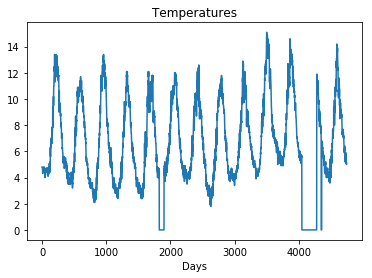

In [22]:
plt.plot(all_temps)
plt.xlabel('Days')
plt.title('Temperatures')
plt.show()

In [23]:
temp_table = []
for i in range(len(all_temps)):
    temp_table.append([all_temps[i]])
print(temp_table)

[[4.8], [4.8], [4.8], [4.8], [4.7], [4.7], [4.7], [4.4], [4.3], [4.4], [4.5], [4.7], [4.7], [4.7], [4.7], [4.7], [4.7], [4.7], [4.7], [4.8], [4.7], [4.7], [4.7], [4.7], [4.7], [4.7], [4.7], [4.7], [4.7], [4.8], [4.8], [4.8], [4.8], [4.7], [4.5], [4.7], [4.7], [4.7], [4.7], [4.7], [4.7], [4.3], [4.4], [4.0], [4.3], [4.4], [4.4], [4.4], [4.4], [4.4], [4.4], [4.5], [4.4], [4.4], [4.4], [4.4], [4.4], [4.4], [4.7], [4.4], [4.7], [4.7], [4.4], [4.5], [4.4], [4.4], [4.7], [4.7], [4.5], [4.7], [4.7], [4.7], [4.7], [4.7], [4.7], [4.7], [4.7], [4.7], [4.5], [4.7], [4.4], [4.4], [4.7], [4.7], [4.2], [4.4], [4.7], [4.4], [4.3], [4.3], [4.3], [4.3], [4.1], [4.7], [4.4], [4.4], [4.3], [4.4], [4.4], [4.3], [4.3], [4.3], [4.4], [4.4], [4.4], [4.7], [4.8], [4.3], [4.5], [4.6], [4.8], [4.4], [4.7], [4.4], [5.1], [4.8], [5.1], [4.4], [4.7], [5.1], [4.8], [5.1], [5.1], [5.1], [4.8], [5.2], [4.7], [6.3], [5.9], [5.8], [5.8], [5.6], [5.8], [5.9], [6.3], [6.6], [6.3], [6.4], [6.6], [7.0], [6.4], [6.4], [6.7]

In [24]:
myFile = open('all_temps.csv', 'w') 
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(temp_table)

## Great, we have all the data!